In [43]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm # how much data is process till now
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

In [44]:
# Load vgg16 Model
model = VGG16()

# restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)

# Summerize
print(model.summary())


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
"""# extract features from image
features = {}
directory = 'input\Images'

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature"""

"# extract features from image\nfeatures = {}\ndirectory = 'input\\Images'\n\nfor img_name in tqdm(os.listdir(directory)):\n    # load the image from file\n    img_path = directory + '/' + img_name\n    image = load_img(img_path, target_size=(224, 224))\n    # convert image pixels to numpy array\n    image = img_to_array(image)\n    # reshape data for model\n    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))\n    # preprocess image for vgg\n    image = preprocess_input(image)\n    # extract features\n    feature = model.predict(image, verbose=0)\n    # get image ID\n    image_id = img_name.split('.')[0]\n    # store feature\n    features[image_id] = feature"

In [46]:
image = load_img("pexels-tim-gouw-175658.jpg", target_size=(224, 224))
    # convert image pixels to numpy array
image = img_to_array(image)
    # reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
image = preprocess_input(image)
fe=model.predict(image, verbose=0)

In [47]:
"""# store features in pickle
pickle.dump(features, open(os.path.join('features.pkl'), 'wb'))"""

"# store features in pickle\npickle.dump(features, open(os.path.join('features.pkl'), 'wb'))"

In [48]:
# load features from pickle
with open(os.path.join('features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [49]:
with open(os.path.join('input\captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [50]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [51]:
len(mapping)

8091

In [52]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [53]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [54]:
# preprocess the text
clean(mapping)

In [55]:
# after preprocess of text
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [56]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [57]:
len(all_captions)

40455

In [58]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [59]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [60]:
vocab_size

8485

In [61]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [62]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [63]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

In [64]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [65]:
epochs = 20
batch_size = 32

In [66]:
"""# train the model

steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)"""

'# train the model\n\nsteps = len(train) // batch_size\n\nfor i in range(epochs):\n    # create data generator\n    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)\n    # fit for one epoch\n    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)'

In [67]:
"""# save the model
model.save('best_model.h5')"""


"# save the model\nmodel.save('best_model.h5')"

In [68]:
model = tf.keras.models.load_model('best_model.h5')
print(model)


In [69]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [70]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [71]:
"""from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))"""

'from nltk.translate.bleu_score import corpus_bleu\n# validate with test data\nactual, predicted = list(), list()\n\nfor key in tqdm(test):\n    # get actual caption\n    captions = mapping[key]\n    # predict the caption for image\n    y_pred = predict_caption(model, features[key], tokenizer, max_length)\n    # split into words\n    actual_captions = [caption.split() for caption in captions]\n    y_pred = y_pred.split()\n    # append to the list\n    actual.append(actual_captions)\n    predicted.append(y_pred)\n# calcuate BLEU score\nprint("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))\nprint("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))'

In [72]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join("input\Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    print(features[image_id])
    print(tokenizer,max_length)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq blonde horse and blonde girl in black sweatshirt are staring at fire in barrel endseq
startseq girl and her horse stand by fire endseq
startseq girl holding horse 's lead behind fire endseq
startseq "a man and girl and two horses are near contained fire ." endseq
startseq two people and two horses watching fire endseq
[[0. 0. 0. ... 0. 0. 0.]]
<keras.preprocessing.text.Tokenizer object at 0x000001EC76859CC0> 35
--------------------Predicted--------------------
startseq two horses look over fire endseq


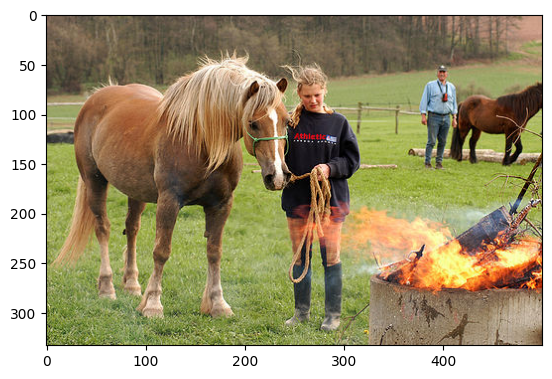

In [73]:
generate_caption("10815824_2997e03d76.jpg")

---------------------Actual---------------------
startseq fisherman fishes at the bank of foggy river endseq
startseq man fishes by tree in the morning mist endseq
startseq man fishes under large tree endseq
startseq man fishing near large tree endseq
startseq man is fishing in foggy lake endseq
[[0.        1.0276389 2.477067  ... 3.1528466 0.        0.       ]]
<keras.preprocessing.text.Tokenizer object at 0x000001EC76859CC0> 35
--------------------Predicted--------------------
startseq two people walking along the bank of pond endseq


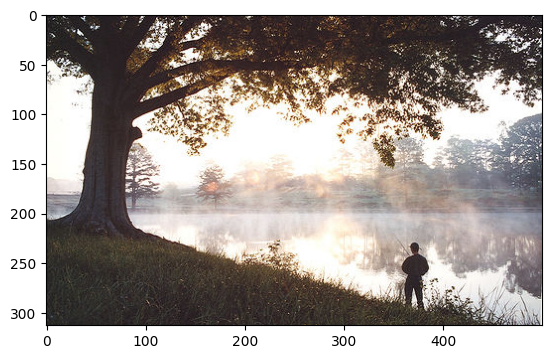

In [74]:
generate_caption("17273391_55cfc7d3d4.jpg")

---------------------Actual---------------------
startseq child feels like he 's flying as his mom throws him up in the air during game endseq
startseq woman in white is throwing boy into the air endseq
startseq woman is tossing small child in the air playfully endseq
startseq woman tosses toddler in the air endseq
startseq the child enjoys being tossed in the air by his mother endseq
[[0.         0.02768242 4.2926154  ... 0.2855878  0.         0.        ]]
<keras.preprocessing.text.Tokenizer object at 0x000001EC76859CC0> 35
--------------------Predicted--------------------
startseq boy feels at the sky in pool endseq


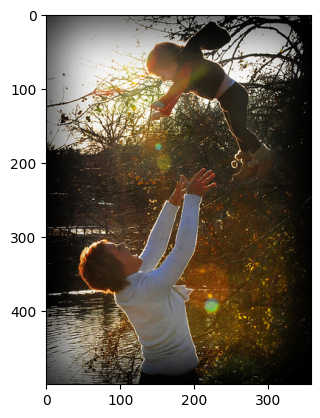

In [75]:
generate_caption("2343879696_59a82f496f.jpg")

In [76]:

  
y_pred = predict_caption(model, fe, tokenizer, max_length)
print(y_pred)


startseq two girls are performing in midair endseq
